<a href="https://colab.research.google.com/github/NbtKmy/nachtzeddel/blob/main/claude3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Claude 3.5 Vision

https://docs.anthropic.com/en/docs/build-with-claude/vision


>You can include multiple images in a single request (up to 5 for claude.ai and 20 for API requests). Claude will analyze all provided images when formulating its response. This can be helpful for comparing or contrasting images.

>If your input image is too large and needs to be resized, it will increase latency of time-to-first-token, without giving you any additional model performance. Very small images under 200 pixels on any given edge may degrade performance.

>Here is a table of maximum image sizes accepted by our API that will not be resized for common aspect ratios. With the Claude 3.5 Sonnet model, these images use approximately 1,600 tokens and around $4.80/1K image.

|Aspect ratio	| Image size |
|-------------|------------|
| 1:1	| 1092x1092 px |
| 3:4	| 951x1268 px |
| 2:3	| 896x1344 px |
| 9:16	| 819x1456 px |
|1:2	| 784x1568 px |

(Stand: 22. 06. 2024)




In [ ]:
!pip install -q anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.5/863.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00


In [ ]:
import glob
import base64
import matplotlib.pyplot as plt
import cv2


['0004.jpg', '0006.jpg', '0008.jpg', '0002.jpg', '0010.jpg']


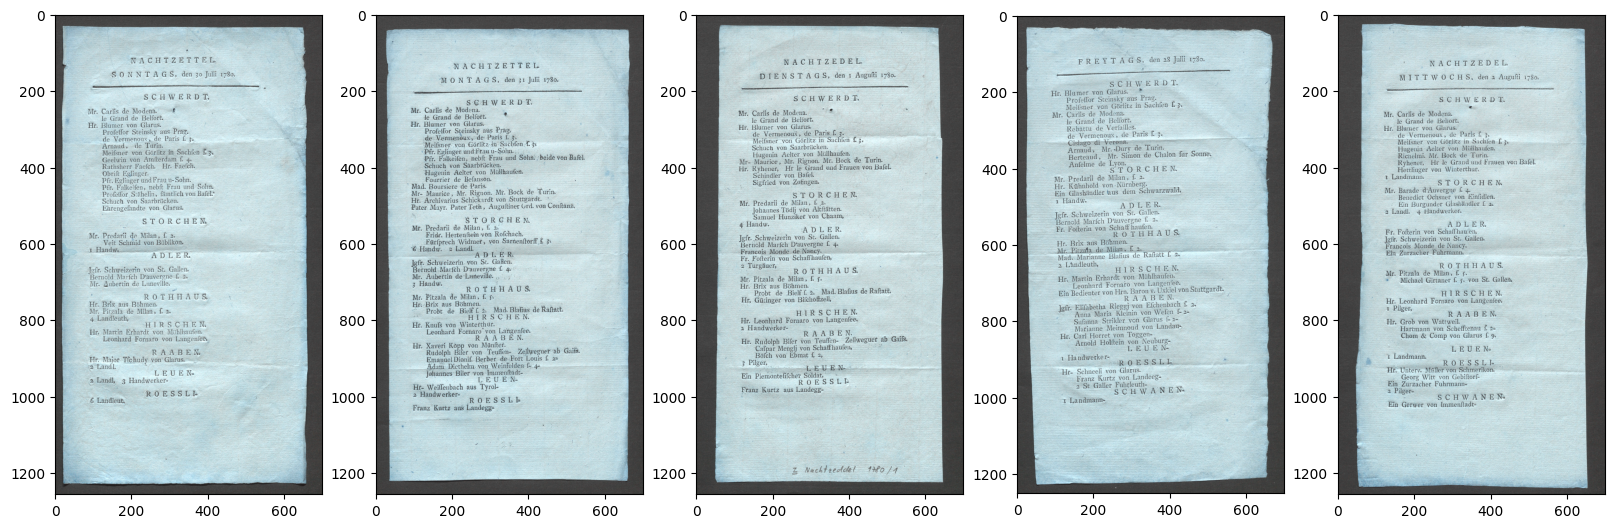

In [ ]:
images = glob.glob("*.jpg")
print(images)


plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(1, columns, i + 1)
    plt.imshow(cv2.imread(image))


In [ ]:
import os
from google.colab import userdata
import anthropic


os.environ["ANTHROPIC_API_KEY"] = userdata.get("ANTHROPIC_API_KEY")
client = anthropic.Client()

## Claude für Transkription

Es gibt einige Beispiele für Transkriptionsaufgabe mit Claude in [Cookbook](https://github.com/anthropics/anthropic-cookbook/blob/main/multimodal/how_to_transcribe_text.ipynb).

Unten ist zuerst ein Test-Prozess mit einem Bild.



In [ ]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode("utf-8")
        return base64_string

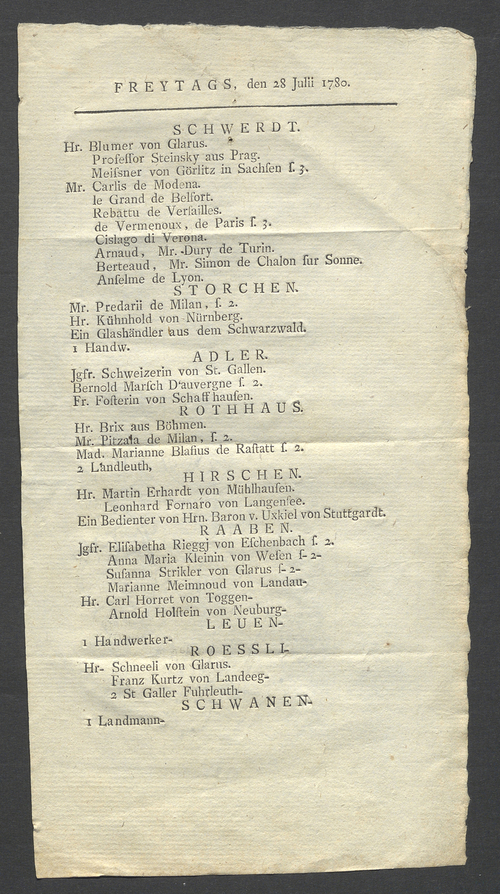

In [ ]:
from IPython.display import Image
Image(filename="0002.jpg")

In [ ]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image("0002.jpg")}},
            {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
        ]
    }
]

response = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=4096,
    messages=message_list
)
print(response.content[0].text)

FREYTAGS, den 28 Julii 1780.

SCHWERDT.
Hr. Blumer von Glarus.
Profeffor Steinsky aus Prag.
Meifner von Görlitz in Sachfen £ 3.
Mr. Carlis de Modena.
le Grand de Belfort.
Renatu de Verdailles.
de Vermenoux, de Paris £ 3.
Chiago di Verona.
Arnaud, Mr. Mary de Turin.
Berteaud, Mr. Simon de Chalon fur Sonne.
Audeline de Lyon.

STORCHEN.
Mr. Praderi de Milan £ 2.
Hr. Kuhnhold von Nürnberg.
Ein Glashandler aus dem Schwarzwald.
1 Handw.

ADLER.
Jgfr. Schweizerin von St. Gallen.
Berold Marich D'auvergne £ 2.
Fr. Folterin von Schaffhaufen.

ROTHHAUS.
Hr. Brix aus Böhmen.
Mr. Pizzala de Milan £ 2.
Mad. Marianne Blafius de Raffat £ 2.
2 Landleuth.

HIRSCHEN.
Hr. Martin Erhardt von Mühlhaufen.
Leonhard Fornaro von Lauffenburg.
Ein Bedienter von Hrn. Baron Gigel von Stuttgardt.

RABEN.
Jgfr. Elifabetha Rieggi von Eichenbach £ 2.
Anna Maria Kleinert von Wien £ 2.
Sufanna Streiker von Glarus £ 2.
Marianne Michel von Landau.
Hr. Carl Horrer von Toggen-
burg.
Arnold Holftein von Neuburg.

LEUEN.
1 Han

## Transkription mehrer Texte

Wenn der Testlauf gut funktioniert, kann man diesen Prozess für mehrere Texte erweitern...

Im Folgenden werden die mehreren Bilder durch Claude 3.5 transkribiert und unter den selben Namen als Txt-File gespeichert.

In [ ]:
def transcribe_claude(img_path):
    message_list = [
      {
          "role": 'user',
          "content": [
              {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_base64_encoded_image(img_path)}},
              {"type": "text", "text": "Transcribe this text. Only output the text and nothing else."}
          ]
      }
    ]

    response = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=4096,
        messages=message_list
    )
    return response.content[0].text



In [ ]:
import os

for img_path in images:

    file_name = os.path.basename(img_path)
    file_name = file_name.replace(".jpg", ".txt")

    txt = transcribe_claude(img_path)


    with open(file_name, "w") as f:
        f.write(txt)

In [ ]:
!cat 0004.txt

NACHTZETTEL
SONNTAGS, den 30 Julii 1780.

SCHWERDT.
Mr. Carlis de Modena.
le Grand de Belfort.
Hr. Blumer von Glarus.
Profesor Steinsky aus Prag.
de Vermenoux, de Paris f. 3.
Arnaud, de Turin.
Meifsner von Görlitz in Sachfen f. 3.
Geelwin von Amfterdam f. 4.
Rathsherr Faefch. Hr. Faefch.
Obrift Eglinger.
Pfr. Eglinger und Frau u. Sohn.
Pfr. Falkeifen, nebft Frau und Sohn.
Profefor Stähelin, Bürlich von Bafel.
Schuch von Saarbrücken.
Ehrengesandte von Glarus.

STORCHEN.
Mr. Predarii de Milan, f. 2.
Veit Schmid von Büblifon.
1 Handw.

ADLER.
Jgfr. Schweizerin von St. Gallen.
Bernard Martich D'auvergne f. 2.
Mr. Auberin de Luneville.

ROTHHAUS.
Hr. Brix aus Böhmen.
Mr. Pizzala de Milan, f. 2.
4 Landleuth.

HIRSCHEN.
Hr. Martin Erhardt von Mühlhaufen.
Leonhard Fornaro von Langenfee.

RAABEN.
Hr. Major Tfchudy von Glarus.
2 Landl.

LEUEN-
2 Landl, 3 Handwerker.

ROESSLI.
6 Landleut.

# Von Text-Datei zu TEI/XML

... es wäre gut, wenn die Textdaten noch manuell korrigiert werden und darüber hinaus mit weiterer Information, z.B. geographische Koordinaten der Hotel usw., versehen werden. Zu diesem Zweck sollen die Textdateien ins einfache TEI/XML-Format umgewandelt werden.

Zu diesem Zweck folge ich hier den Anleitung [Best Practices for TEI in Libraries (Vers. 4, Level 2)](https://tei-c.org/extra/teiinlibraries/).



In [ ]:
tei_template = """<?xml version="1.0" encoding="UTF-8"?>
              <TEI xmlns="http://www.tei-c.org/ns/1.0">
                <teiHeader>
                    <fileDesc>
                        <titleStmt>
                            <title>###</title>
                            <respStmt>
                                <resp>This file is automatically converted from text file into TEI/XML format.</resp>
                                <persName>Nobutake Kamiya</persName>
                            </respStmt>
                        </titleStmt>
                        <publicationStmt>
                            <publisher>Unknown</publisher>
                            <pubPlace>Zurich</pubPlace>
                        </publicationStmt>
                        <sourceDesc>
                            <bibl>
                                <title level="a">###</title>
                                <note>The leaflet published and distributed in Zurich</note>
                            </bibl>
                        </sourceDesc>
                    </fileDesc>
                </teiHeader>
              <text>
                  <body>
                  </body>
              </text>
          </TEI>
"""

In [ ]:
import xml.etree.ElementTree as ET

root = ET.fromstring(tei_template)
print(root[0][0][0][0].text)
print(root[0][0][2][0][0].text)
print(root[1][0].text)
for child in root:
    print(child.tag, child.attrib)


###
###

                  
{http://www.tei-c.org/ns/1.0}teiHeader {}
{http://www.tei-c.org/ns/1.0}text {}


In [ ]:
import xml.etree.ElementTree as ET
import os
import glob

def get_part_from_text(text_array):

    indices = [i for i, x in enumerate(text_array) if len(x) == 0]
    segmented_text = []
    if len(indices) !=0:
        for j, ind in enumerate(indices):
            if j == 0:
                part = text_array[:ind]
                segmented_text.append(part)
            else:
                part = text_array[indices[j-1]+1:ind]
                segmented_text.append(part)

        part = text_array[indices[-1]+1:]
        segmented_text.append(part)
    else:
        segmented_text.append(text_array[:2])
        segmented_text.append(text_array[2:])
    return segmented_text

def create_tei(segmented_text):

    root = ET.fromstring(tei_template)
    ET.register_namespace("", "http://www.tei-c.org/ns/1.0")

    if len(segmented_text[0]) == 1:
        title = "[" + segmented_text[0][0] + "]"
    else:
        title = "[" + ", ".join(segmented_text[0]) + "]"

    root[0][0][0][0].text = title
    root[0][0][2][0][0].text = title


    for k, s in enumerate(segmented_text):
        if k == 0:
            head_text = "<head>" + "<lb />".join(s) + "</head>"
            root[1][0].append(ET.fromstring(head_text))

        else:

            escaped_lines = [ET.tostring(ET.fromstring("<lb />")).decode() + line.replace("&", "&amp;").replace("<", "&lt;").replace(">", "&gt;") for line in s]
            div_text = "<div><p>" + "".join(escaped_lines) + "</p></div>"
            root[1][0].append(ET.fromstring(div_text))

    return root


texts = glob.glob("*.txt")

for text in texts:

    with open(text, "r") as f:
        t = f.read()

    array = t.split("\n")
    segmented_text = get_part_from_text(array)
    print(segmented_text)
    xml_string = ET.tostring(create_tei(segmented_text), encoding='utf8').decode('utf8')
    #print(xml_string)
    file_name = os.path.basename(text)
    file_name = file_name.replace(".txt", ".xml")

    with open(file_name, "w") as f:
        f.write(xml_string)


[['NACHTZEDEL', 'MITTWOCHS, den 2 Augusti 1780.'], ['SCHWERDT.', 'Mr. Carlis de Modena.', 'le Grand de Beliort.', 'Hr. Blumer von Glarus.', 'de Vermenoux, de Paris f. 3.', 'Meisner von Görlitz in Sachsen f. 3.', 'Hugenin Aelter von Müllhausen.', 'Richelmi. Mr. Bock de Turin.', 'Ryhener, Hr le Grand und Frauen von Basel.', 'Hertlinger von Winterthur.', '1 Landmann.'], ['STORCHEN.', "Mr. Barade d'Auvergne f. 4.", 'Benedict Ochsner von Einsidlen.', 'Ein Burgunder Glashändler f. 2.', '2 Landl. 4 Handwerker.'], ['ADLER.', 'Fr. Fosterin von Schaffhausen.', 'Jgfr. Schweizerin von St. Gallen.', 'François Monde de Nancy.', 'Ein Zurzacher Fuhrmann.'], ['ROTHHAUS.', 'Mr. Pitzala de Milan, f. 5.', 'Michael Girtaner f. 5. von St. Gallen.'], ['HIRSCHEN.', 'Hr. Leonhard Fornaro von Langenfee.', '1 Pilger.'], ['RAABEN.', 'Hr. Grob von Wattweil.', 'Hartmann von Schefftenau f. 2.', 'Chom & Comp von Glarus f. 9.'], ['LEUEN-', '1 Landmann.'], ['ROESSL-', 'Hr. Unterv. Müller von Schmerfkon.', 'Georg Witt v

In [ ]:
!cat 0004.xml

<?xml version='1.0' encoding='utf8'?>
<TEI xmlns="http://www.tei-c.org/ns/1.0">
                <teiHeader>
                    <fileDesc>
                        <titleStmt>
                            <title>[NACHTZETTEL, SONNTAGS, den 30 Julii 1780.]</title>
                            <respStmt>
                                <resp>This file is automatically converted from text file into TEI/XML format.</resp>
                                <persName>Nobutake Kamiya</persName>
                            </respStmt>
                        </titleStmt>
                        <publicationStmt>
                            <publisher>Unknown</publisher>
                            <pubPlace>Zurich</pubPlace>
                        </publicationStmt>
                        <sourceDesc>
                            <bibl>
                                <title level="a">[NACHTZETTEL, SONNTAGS, den 30 Julii 1780.]</title>
                                <note>The leaflet published an

## Die simplen TEI-Daten manuel verbessern

```
<head>NACHTZEDEL
            <date when="1780-08-02">MITTWOCHS, den 2 Augusti 1780.</date>
            </head>
            <div n="1">
            <head><location><placeName>SCHWERDT.</placeName><geo>47.371667, 8.541944</geo></location></head>
            <listPerson>
                    <person><persName>Mr. Carlis de Modena.</persName></person>
                    <person><persName>le Grand de Beliort.</persName></person>
                    <person><persName>Hr. Blumer von Glarus.</persName></person>
                    <personGrp size="4"><p>de Vermenoux, de Paris f. 3.</p></personGrp>
                    <personGrp size="4"><p>Meisner von Görlitz in Sachsen f. 3.</p></personGrp>
                    <person><persName>Hugenin Aelter von Müllhausen.</persName></person>
                    <person><persName>Richelmi. Mr. Bock de Turin.</persName></person>
                    <personGrp size="2"><p>Ryhener, Hr le Grand und Frauen von Basel.</p></personGrp>
                    <person><persName>Hertlinger von Winterthur.</persName></person>
                    <personGrp size="1"><p>1 Landmann.</p></personGrp>
            </listPerson>
            </div>
  ```
  